# Hypothesis_Testing_Case

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
import math
import warnings
warnings.filterwarnings("ignore")

# BUSINESS PROBLEM-1

### BACKGROUND: 
The Lending Club is a peer-to-peer lending site where members make loans to 
each other. The site makes anonymized data on loans and borrowers publicly available. 

### BUSINESS PROBLEM:
Using lending club loans data, the team would like to test below hypothesis on how different 
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan 
amounts)
b. Loan length is directly effecting intrest rate.
c. Inrest rate varies for different purpose of loans
d. There is relationship between FICO scores and Home Ownership. It means that, People 
with owning home will have high FICO scores.

#### DATA AVAILABLE:
 LoansData.csv

###### The data have the following variables (with data type and explanation of meaning)

 Amount.Requested - numeric. The amount (in dollars) requested in the loan application.

 Amount.Funded.By.Investors - numeric. The amount (in dollars) loaned to the individual.

 Interest.rate – character. The lending interest rate charged to the borrower.

 Loan.length - character. The length of time (in months) of the loan.

 Loan.Purpose – categorical variable. The purpose of the loan as stated by the applicant.

 Debt.to.Income.Ratio – character. The % of consumer’s gross income going toward paying 
debts.

 State - character. The abbreviation for the U.S. state of residence of the loan applicant.

 Home.ownership - character. Indicates whether the applicant owns, rents, or has a 
mortgage.

 Monthly.income - categorical. The monthly income of the applicant (in dollars).

 FICO.range – categorical (expressed as a string label e.g. “650-655”). A range indicating the 
applicants FICO score.

 Open.CREDIT.Lines - numeric. The number of open lines of credit at the time of 
application.

 Revolving.CREDIT.Balance - numeric. The total amount outstanding all lines of credit.

 Inquiries.in.the.Last.6.Months - numeric. Number of credit inquiries in the previous 6 
months.

 Employment.Length - character. Length of time employed at current job.


In [2]:
LoansData = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Basic_Statistics_Hypothesis_Testing/LoansData.csv")

In [3]:
LoansData.rename(columns={'Amount.Funded.By.Investors': 'Amount_Funded_By_Investors','Interest.Rate':'Interest_Rate','Amount.Requested':'Amount_Requested','Loan.Length':'Loan_Length','Loan.Purpose':'Loan_Purpose','Debt.To.Income.Ratio':'Debt_To_Income_Ratio','Home.Ownership':'Home_Ownership','Monthly.Income':'Monthly_Income','FICO.Range':'FICO_Range','Open.CREDIT.Lines':'Open_CREDIT_Lines','Revolving.CREDIT.Balance':'Revolving_CREDIT_Balance','Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months','Employment.Length':'Employment_Length'},inplace=True)

In [4]:
LoansData.nunique()

Amount_Requested                   380
Amount_Funded_By_Investors         710
Interest_Rate                      275
Loan_Length                          2
Loan_Purpose                        14
Debt_To_Income_Ratio              1669
State                               46
Home_Ownership                       5
Monthly_Income                     632
FICO_Range                          38
Open_CREDIT_Lines                   29
Revolving_CREDIT_Balance          2349
Inquiries_in_the_Last_6_Months      10
Employment_Length                   11
dtype: int64

In [5]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [6]:
LoansData.describe().head(1)

,Amount_Requested,Amount_Funded_By_Investors,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2499.0,2499.0,2499.0,2497.0,2497.0,2497.0


In [7]:
LoansData['Interest_Rate'] = LoansData['Interest_Rate'].str.replace("%", "").astype(float)
LoansData['Debt_To_Income_Ratio'] = LoansData['Debt_To_Income_Ratio'].str.replace("%", "").astype(float)

In [8]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [9]:
LoansData.describe().head(1)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2499.0,2499.0,2498.0,2499.0,2499.0,2497.0,2497.0,2497.0


In [10]:
# No duplicate records found
LoansData.duplicated().sum()

0

### Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

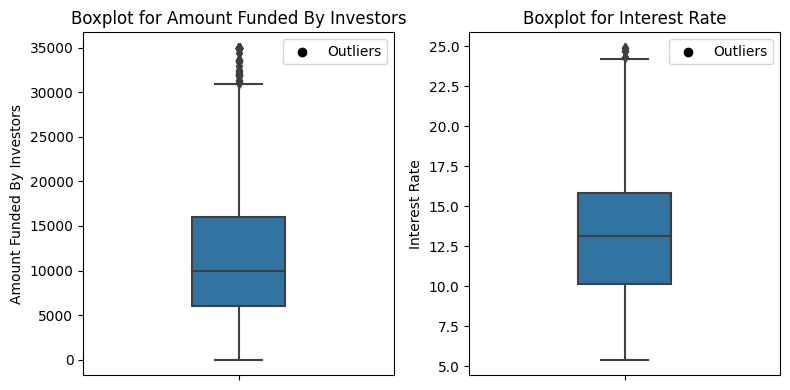

In [11]:
# finding outliers in LoansData['Amount_Funded_By_Investors'] and LoansData['Interest_Rate']

plt.figure(figsize=(8,4))



# for column Amount.Funded.By.Investors
plt.subplot(1,2,1)
sns.boxplot(y=LoansData['Amount_Funded_By_Investors'],width=0.3)
plt.scatter([],[], color='black',marker='o',label='Outliers')
plt.legend()
plt.title('Boxplot for Amount Funded By Investors')
plt.ylabel('Amount Funded By Investors')


# for column Interest.Rate
plt.subplot(1,2,2)
sns.boxplot(y= LoansData['Interest_Rate'],width=0.3)
plt.scatter([],[], marker='o', label='Outliers', color='black')
plt.legend()
plt.title('Boxplot for Interest Rate')
plt.ylabel('Interest Rate')




plt.tight_layout()
plt.show()

In [12]:
# As the above chart shows there are many outliers present, so we need to do the outlier treatment for this column

In [13]:
Q1 = LoansData['Amount_Funded_By_Investors'].quantile(0.25)
Q3 = LoansData['Amount_Funded_By_Investors'].quantile(0.75)
IQR_1 = Q3-Q1
Upper_limit_1 = Q3 + 1.5* IQR_1
Lower_limit_1 = Q1 - 1.5* IQR_1


print('Q1: ',Q1)
print('Q3: ',Q3)
print('IQR_1: ',IQR_1)
print('Upper_limit_1: ',Upper_limit_1)
print('Lower_limit_1: ',Lower_limit_1)


print('')

p1 = LoansData['Amount_Funded_By_Investors'].quantile(0.25)
p3 = LoansData['Amount_Funded_By_Investors'].quantile(0.75)
IQR_2 = p3-p1
Upper_limit_2 = p3 + 1.5* IQR_2
Lower_limit_2 = p1 - 1.5* IQR_2


print('p1: ',p1)
print('p3: ',p3)
print('IQR_2: ',IQR_2)
print('Upper_limit_2: ',Upper_limit_2)
print('Lower_limit_2: ',Lower_limit_2)

Q1:  6000.0
Q3:  16000.0
IQR_1:  10000.0
Upper_limit_1:  31000.0
Lower_limit_1:  -9000.0

p1:  6000.0
p3:  16000.0
IQR_2:  10000.0
Upper_limit_2:  31000.0
Lower_limit_2:  -9000.0


In [14]:
# By this step there will not be any Outlier the the required columns

LoansData = LoansData[
    (((LoansData['Amount_Funded_By_Investors'] >= Lower_limit_1) & (LoansData['Amount_Funded_By_Investors'] <= Upper_limit_1)) | (LoansData['Amount_Funded_By_Investors'].isna()))
    &
    (((LoansData['Interest_Rate'] >= Lower_limit_2) & (LoansData['Interest_Rate'] <= Upper_limit_2)) | (LoansData['Interest_Rate'].isna()))]

In [15]:
# Number of Null values in LoansData['Amount_Funded_By_Investors']
print(LoansData['Amount_Funded_By_Investors'].isna().sum())

# Mean value of LoansData['Amount_Funded_By_Investors']
print(LoansData['Amount_Funded_By_Investors'].mean())

# Filling null as per mean value of the column
LoansData.loc[:, 'Amount_Funded_By_Investors'][LoansData['Amount_Funded_By_Investors'].isna()] = LoansData['Amount_Funded_By_Investors'].mean()

1
11418.54622587269


In [16]:
# Number of Null values in the LoansData['Interest_Rate']
print(LoansData['Interest_Rate'].isna().sum())

# Mean value of LoansData['Interest_Rate']
print(LoansData['Interest_Rate'].mean())

# Filling the null value as per mean value
LoansData.loc[:,'Interest_Rate'][LoansData['Interest_Rate'].isna()] = LoansData['Interest_Rate'].mean()

2
12.974453574363189


In [17]:
# Number of Null values in the LoansData['Interest_Rate']
print(LoansData['Interest_Rate'].isna().sum())

# Number of Null values in LoansData['Amount_Funded_By_Investors']
print(LoansData['Amount_Funded_By_Investors'].isna().sum())

0
0


### Performing the hypothesis

In [18]:
# Correlation between LoansData['Interest_Rate'] and LoansData['Amount_Funded_By_Investors']
LoansData.loc[:,['Interest_Rate','Amount_Funded_By_Investors']].corr()

# corr value of (0.319617 < 0.50) and (0.319617 > -0.50)
# so the relationship between them is not that strong.

,Interest_Rate,Amount_Funded_By_Investors
Interest_Rate,1.000000,0.319617
Amount_Funded_By_Investors,0.319617,1.000000


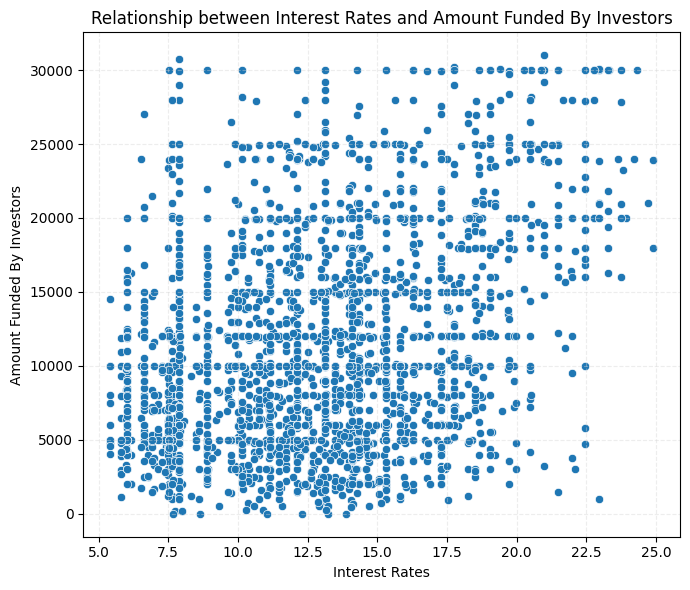

In [19]:
#Scatterplot of LoansData['Interest_Rate'] and LoansData['Amount_Funded_By_Investors'] to visualize the relationship between them


plt.figure(figsize=(7,6))
sns.scatterplot(x= LoansData['Interest_Rate'], y= LoansData['Amount_Funded_By_Investors'])

plt.title('Relationship between Interest Rates and Amount Funded By Investors')
plt.xlabel('Interest Rates')
plt.ylabel('Amount Funded By Investors')

plt.grid(linestyle= '--',color= 'lightgray',alpha=.4)
plt.tight_layout()
plt.show()


##### Perform the test

In [20]:
stats.pearsonr(x= LoansData['Interest_Rate'], y=LoansData['Amount_Funded_By_Investors'])

PearsonRResult(statistic=0.31961746844037126, pvalue=5.603056967865925e-59)

In [21]:
value = 5.603056967865925e-59
converted_value = "{:.20f}".format(value)

print(converted_value)

0.00000000000000000000


### Loan length is directly effecting intrest rate

In [22]:
LoansData['Loan_Length'].isnull().sum()

0

In [23]:
# There is no null value in any colummn (Interest rate and Loan length)
# Also there is no outliers in Interest rate we already get rid from them in previous steps. 

In [24]:
LoansData['Loan_Length'].value_counts()

36 months    1924
60 months     512
Name: Loan_Length, dtype: int64

In [25]:
# Mean of Interest rates when provided for 36 months
M_36 = LoansData.loc[:, 'Interest_Rate'][LoansData.loc[:,'Loan_Length'] == '36 months']

# Mean of Interest rates when provided for 60 months
M_60 = LoansData.loc[:, 'Interest_Rate'][LoansData.loc[:,'Loan_Length'] == '60 months']

print('M_36: ',M_36.mean())
print('M_60: ', M_60.mean())

M_36:  12.10500982700038
M_60:  16.24166015625


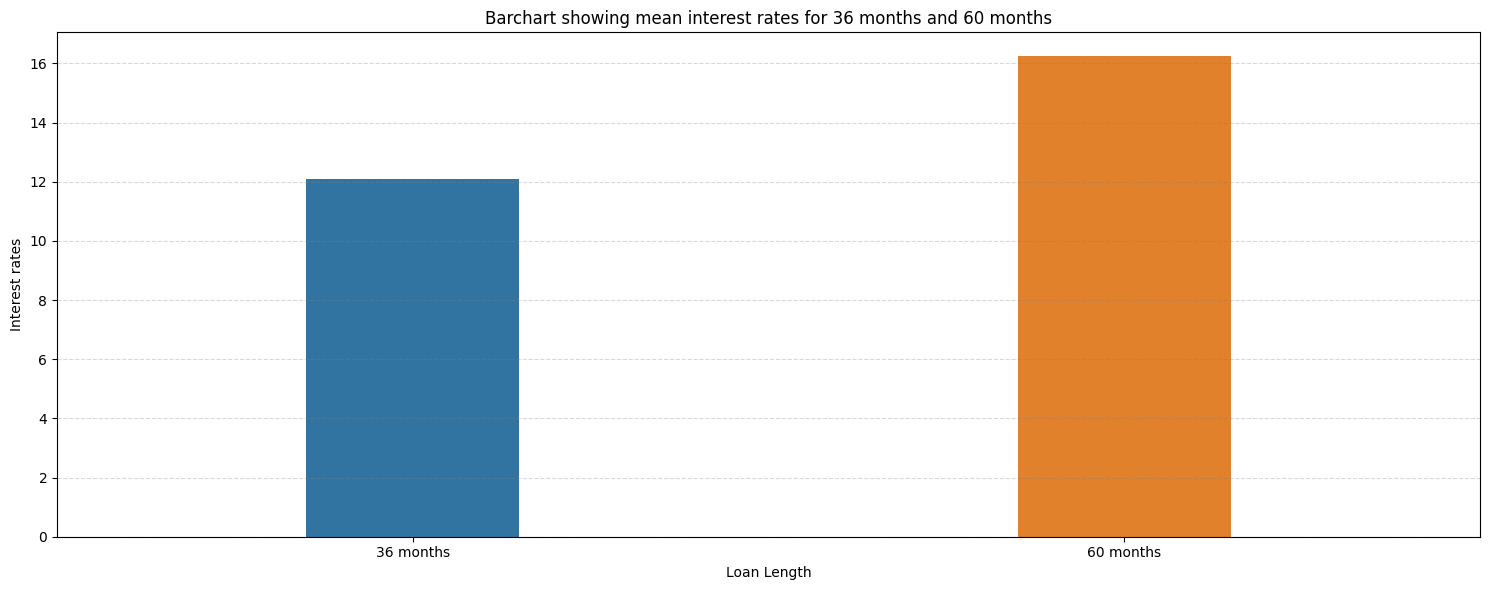

In [26]:
# Just to visualize

plt.figure(figsize=(15,6))

sns.barplot(x=['36 months', '60 months'], y=[M_36.mean(), M_60.mean()],width=0.3)

plt.title('Barchart showing mean interest rates for 36 months and 60 months')
plt.xlabel('Loan Length')
plt.ylabel('Interest rates')

plt.grid(axis='y',color='grey',alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

##### perform the test

In [27]:
stats.f_oneway(M_36, M_60)

F_onewayResult(statistic=491.0629029886753, pvalue=2.890299886659158e-99)

In [28]:
value = 2.890299886659158e-99
converted_value = "{:.20f}".format(value)

print(converted_value)

0.00000000000000000000


As, pvalue <<< p
2.890299886659158e-99 <<< 0.05

##### Conclusion: 
As the obtained pvalue is very less then 0.05, So we reject the Ho. There is positive relationship between interest rate and loan duration.

##### Business Conclusion:
This indicates that borrowers who opt for longer loan durations may be subject to higher interest rates compared to those choosing shorter loan durations.

### Inrest rate varies for different purpose of loans

In [29]:
LoansData.head(1)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.9,36 months,debt_consolidation,14.9,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


In [30]:
# There is no null value
LoansData['Loan_Purpose'].isnull().sum()

0

In [31]:
LoansData['Loan_Purpose'].value_counts()

debt_consolidation    1262
credit_card            439
other                  198
home_improvement       148
major_purchase         100
small_business          84
car                     50
wedding                 39
medical                 29
moving                  28
vacation                21
house                   19
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [32]:
# To get the unique values fromk the series
LoansData['Loan_Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [33]:
x1 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'debt_consolidation']
x2 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'credit_card']
x3 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'moving']
x4 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'car']
x5 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'vacation']
x6 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'home_improvement']
x7 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'house']
x8 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'major_purchase']
x9 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'educational']
x10 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'medical']
x11 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'wedding']
x12 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'small_business']
x13 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'renewable_energy']
x14 = LoansData.loc[:,'Interest_Rate'][LoansData['Loan_Purpose'] == 'other']
x15 = LoansData.loc[:,'Interest_Rate']

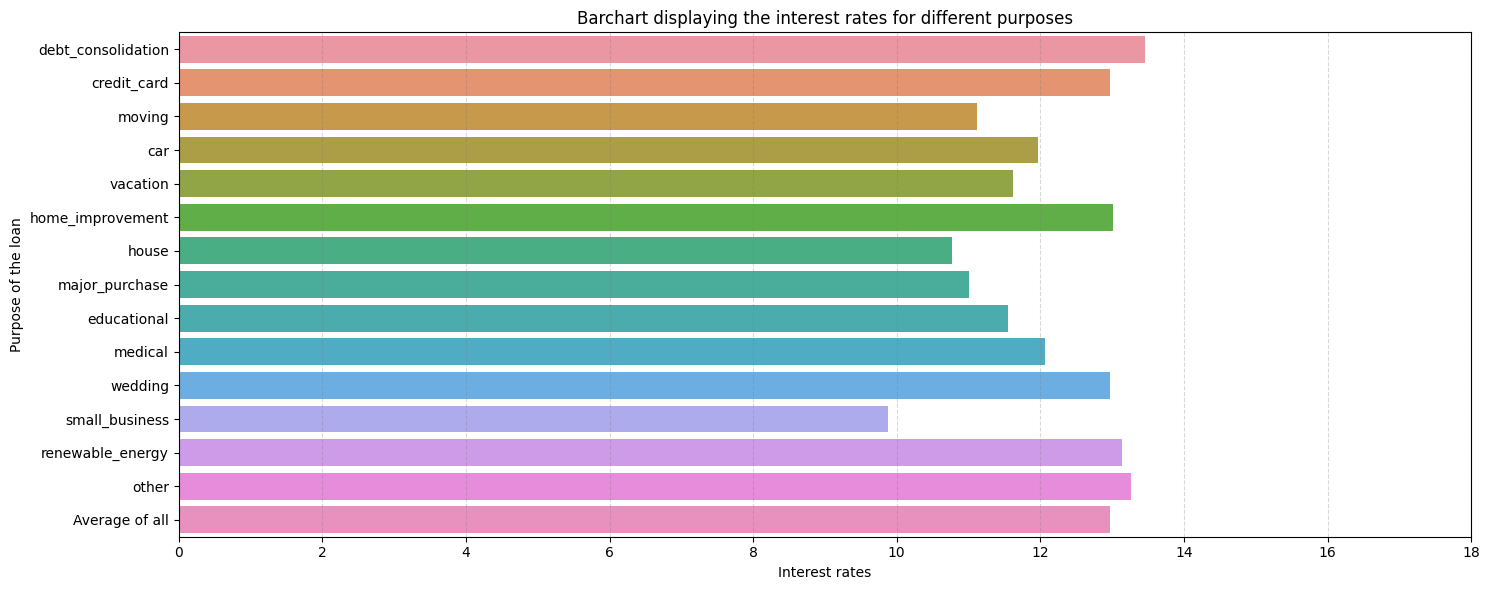

In [34]:
# To visualize

plt.figure(figsize=(15,6))

sns.barplot(x=[x1.mean(),x2.mean(),x4.mean(),x5.mean(),x6.mean(),x7.mean(),x8.mean(),x9.mean(),x10.mean(),
               x11.mean(),x12.mean(),x13.mean(),x14.mean(),x3.mean(), x15.mean()],
            y=['debt_consolidation', 'credit_card', 'moving', 'car','vacation', 'home_improvement', 'house', 
               'major_purchase','educational', 'medical', 'wedding', 'small_business','renewable_energy', 'other', 
               'Average of all'], orient='h',width=.8)

plt.title('Barchart displaying the interest rates for different purposes')
plt.ylabel('Purpose of the loan')
plt.xlabel('Interest rates')
plt.xlim(0,18)

plt.tight_layout()

plt.grid(axis='x',color='grey',alpha=0.3, linestyle='--')
plt.show()

##### Perform the test

In [35]:
stats.f_oneway(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14)

F_onewayResult(statistic=6.793806969323991, pvalue=5.35236064773528e-13)

In [36]:
value = 5.35236064773528e-13
converted_value = "{:.20f}".format(value)

print(converted_value)

0.00000000000053523606


As, pvalue <<< p
5.35236064773528e-13 <<< 0.05

###### Conclusion: 
As the obtained pvalue is very less then 0.05, So we reject the Ho. There is positive relationship between interest rate and purpose of the loan.

###### Business Conclusion:
This indicates that as the purpose of the loan changes, the interest rate of the loan tends to change accordingly.

### There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [37]:
# Finding the Null values
print(LoansData['FICO_Range'].isna().sum())
print(LoansData['Home_Ownership'].isna().sum())

2
1


In [38]:
# Dropping the null values
LoansData = LoansData.loc[:, :][LoansData['FICO_Range'].notnull()]
LoansData = LoansData.loc[:, :][LoansData['Home_Ownership'].notnull()]

In [39]:
print('Home_Ownership',LoansData['Home_Ownership'].value_counts())
print('')
print('FICO_Range',LoansData['FICO_Range'].value_counts())


# Both will be considerd as categorical veriables

Home_Ownership RENT        1127
MORTGAGE    1106
OWN          194
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

FICO_Range 670-674    170
675-679    163
680-684    155
695-699    150
665-669    143
685-689    134
690-694    134
705-709    129
700-704    127
660-664    119
720-724    111
710-714    111
730-734     92
715-719     92
725-729     90
735-739     61
750-754     60
745-749     53
740-744     51
755-759     45
760-764     44
765-769     36
780-784     28
775-779     20
790-794     18
785-789     18
770-774     16
800-804     13
795-799     13
810-814      8
805-809      8
815-819      6
640-644      5
655-659      4
645-649      3
820-824      1
830-834      1
650-654      1
Name: FICO_Range, dtype: int64


In [40]:
tab_ch_test = pd.crosstab(index=LoansData['FICO_Range'],columns=[LoansData['Home_Ownership']])
tab_ch_test.head()

Home_Ownership,MORTGAGE,NONE,OTHER,OWN,RENT
FICO_Range,,,,,
640-644,0,0,0,1,4
645-649,1,0,0,0,2
650-654,1,0,0,0,0
655-659,0,0,1,0,3
660-664,39,0,0,14,66


In [41]:
stats.chi2_contingency(tab_ch_test)

(462.457547713297,
 4.643786184888751e-34,
 148,
 array([[2.27291410e+00, 2.05507604e-03, 1.02753802e-02, 3.98684751e-01,
         2.31607069e+00],
        [1.36374846e+00, 1.23304562e-03, 6.16522811e-03, 2.39210851e-01,
         1.38964242e+00],
        [4.54582820e-01, 4.11015208e-04, 2.05507604e-03, 7.97369503e-02,
         4.63214139e-01],
        [1.81833128e+00, 1.64406083e-03, 8.22030415e-03, 3.18947801e-01,
         1.85285656e+00],
        [5.40953555e+01, 4.89108097e-02, 2.44554048e-01, 9.48869708e+00,
         5.51224825e+01],
        [6.50053432e+01, 5.87751747e-02, 2.93875873e-01, 1.14023839e+01,
         6.62396219e+01],
        [7.72790793e+01, 6.98725853e-02, 3.49362926e-01, 1.35552815e+01,
         7.87464036e+01],
        [7.40969996e+01, 6.69954788e-02, 3.34977394e-01, 1.29971229e+01,
         7.55039046e+01],
        [7.04603370e+01, 6.37073572e-02, 3.18536786e-01, 1.23592273e+01,
         7.17981915e+01],
        [6.09140978e+01, 5.50760378e-02, 2.75380189e-01, 1.0

In [42]:
value = 4.643786184888751e-34
converted_value = "{:.20f}".format(value)

print(converted_value)

0.00000000000000000000


As, pvalue <<< p
4.643786184888751e-34 <<< 0.05

###### Conclusion: 
As the obtained pvalue is very less then 0.05, So we reject the Ho. There is positive relationship between Home ownership and FICO range.

###### Business Conclusion:
As per the analysis, this finding highlights the importance of home ownership for the creditworthiness. Someone haveing own home verses someone living on rent will have sufficient difference in their creditworthiness.

# BUSINESS PROBLEM - 2

### BACKGROUND: 
When an order is placed by a customer of a small manufacturing company, a 
price quote must be developed for that order. Because each order is unique, quotes must be 
established on an order-by-order basis by a pricing expert. The price quote process is laborintensive, as prices depend on many factors such as the part number, customer, geographic 
location, market, and order volume. The sales department manager is concerned that the pricing 
process is too complex, and that there might be too much variability in the quoted prices. An 
improvement team is tasked with studying and improving the pricing process.

After interviewing experts to develop a better understanding of the current process, the team 
designed a study to determine if there is variability between pricing experts. That is, do different 
pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and 
Barry, were asked to independently provide prices for twelve randomly selected orders. Each 
expert provided one price for each of the twelve orders.

#### BUSINESS PROBLEM: 
We would like to assess if there is any difference in the average 
price quotes provided by Mary and Barry.

##### DATA AVAILABLE:
 Price_Quotes.csv

The data set contains the order number, 1 through 12, and the price quotes by Mary 
and Barry for each order. Each row in the data set is the same order. Thus, Mary and 
Barry produced quotes for the same orders.


In [43]:
Price_Quotes = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Basic_Statistics_Hypothesis_Testing/Price_Quotes.csv")
Price_Quotes.head(1)

,Order_Number,Barry_Price,Mary_Price
0,1,126,114


In [44]:
Price_Quotes.describe()

,Order_Number,Barry_Price,Mary_Price
count,12.000000,12.000000,12.000000
mean,6.500000,124.333333,114.750000
std,3.605551,20.698412,11.054616
min,1.000000,94.000000,97.000000
25%,3.750000,106.750000,107.000000
50%,6.500000,131.000000,114.000000
75%,9.250000,140.500000,121.000000
max,12.000000,152.000000,133.000000


In [45]:
Price_Quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [46]:
# No null value in the data
Price_Quotes.isna().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

In [47]:
Price_Quotes.shape

(12, 3)

In [48]:
Price_Quotes.nunique()
# hence no duplicate observation

Order_Number    12
Barry_Price     12
Mary_Price      11
dtype: int64

##### Perform the test

In [49]:
stats.ttest_rel(a= Price_Quotes['Barry_Price'], b=Price_Quotes['Mary_Price'])

Ttest_relResult(statistic=2.5213765108923494, pvalue=0.02840588045242053)

As pvalue < p
0.02840588045242053 < 0.05

###### Conclusion: We reject the null hypothesis. Both the samples are from different population.

###### Business conclusion:
As per the analysis, we can say both Barry and Mary are using different approches or method while quoting the prices. This should be corrected as this is a small organisation. A SOP should be devloped by the organisation to minimize the variability in the quotation.

# BUSINESS PROBLEM-3

## BACKGROUND: 
The New Life Residential Treatment Facility is a NGO that treatsteenagers who
have shown signs of mental illness. It provides housing and supervision of teenagers who are
making the transition from psychiatric hospitals back into the community. Because many of
the teenagers were severely abused as children and have been involved with the juvenile
justice system, behavioral problems are common at New Life. Employee pay is low and staff
turnover (attrition) is high.
A reengineering program wasinstituted at New Life with the goals of lowering behavioral
problems of the kids and decreasing employee turnover rates. As a part of this effort, the
following changes were made:

 Employee shifts were shortened from 10 hours to 8 hours each day.
 Employees were motivated to become more involved in patient treatments. This
included encouraging staff to run varioustherapeutic treatment sessions and allowing
staff to have more say in program changes.

 The activities budget wasincreased.

 A facility-wide performance evaluation system was putinto place that rewarded staff
participation andinnovation.

 Management and staff instituted a program designed to raise expectations about
appropriate behavior from the kids. Thisincluded strict compliance with reporting of
behavioral violations, insistence on participation in therapeutic sessions, and a
lowered tolerance for even moderate behavioralinfractions.

To determine the effectiveness of the reengineering effort, a data set comprised of pre- and
post-reengineering periods was compiled. The information contains two measures of
behavioral problems. A critical incident occurs when a resident goes AWOL (leavesthe
premises without permission), destroys property (e.g., punching a hole in a wall or throwing
furniture through windows), is caught in possession of street drugs, or engages in assault
against other residents or staff members. A teenager istemporarily removed from the facility
when s/he is sent to jail or back to a psychiatric hospital


#### BUSINESS PROBLEM: 
Determine what effect, if any, the reengineering effort had on the 
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Isthere evidence that the critical incidence rate
improved?


##### DATA AVAILABLE: 
Price_Quotes.csv

###### The data set contains 20 months of data; the first 13 months were prior to reengineering. The variables in the data include:

 Reengineer: Whether the month was before (Prior) or after (Post) reengineering

 EmployeeTurnover: The percentage of employees who quit in a given
month, out of the total number of employees

 TRFF(%): The percentage of residents who were temporarily removed from
the facility, out of the total number of residents

 CI (%): The percentage of critical incident reports written that month, out of
the total number of residents


In [50]:
Treatment_Facility = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Basic_Statistics_Hypothesis_Testing/Treatment_Facility.csv")

In [51]:
Treatment_Facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


#### As per the problem statement there are two business problems

1. reengineering effact had on the incidence behavioral
2. reengineering effact had on the staff turnover

In [52]:
Treatment_Facility.columns

Index(['Month', 'Reengineer', 'Employee_Turnover', 'VAR4', 'VAR5'], dtype='object')

In [53]:
Treatment_Facility.rename(columns={'VAR4': 'TRFF', 'VAR5': 'CI'}, inplace=True)

In [54]:
Treatment_Facility.describe()

,Month,Employee_Turnover,TRFF,CI
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,14.169395,16.582433,43.199541
std,5.91608,8.836302,10.088265,41.715909
min,1.00000,0.000000,4.201681,0.000000
25%,5.75000,9.919350,9.596368,20.731427
50%,10.50000,12.470850,14.998702,25.669183
75%,15.25000,19.230750,19.807134,43.776901
max,20.00000,30.769200,41.176471,146.198830


In [55]:
Treatment_Facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFF               20 non-null     float64
 4   CI                 20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [56]:
Treatment_Facility.isna().sum()
# No null value found

Month                0
Reengineer           0
Employee_Turnover    0
TRFF                 0
CI                   0
dtype: int64

In [57]:
Treatment_Facility.nunique()

Month                20
Reengineer            2
Employee_Turnover    19
TRFF                 19
CI                   20
dtype: int64

In [58]:
Treatment_Facility.duplicated().sum()
# No duplicate records found.

0

##### Reengineering effort had on the incidence behavioral

In [59]:
# incidence behavioral prior of reengineering
prior_reeng = Treatment_Facility[Treatment_Facility['Reengineer'] == 'Prior']['CI']

# incidence behavioral post of reengineering
post_reeng = Treatment_Facility[Treatment_Facility['Reengineer'] == 'Post']['CI']

print('Mean of incidence behavioral prior of reengineering: ',prior_reeng.mean())
print('Mean of incidence behavioral post of reengineering: ',post_reeng.mean())

Mean of incidence behavioral prior of reengineering:  53.887906321846145
Mean of incidence behavioral post of reengineering:  23.34971927988571


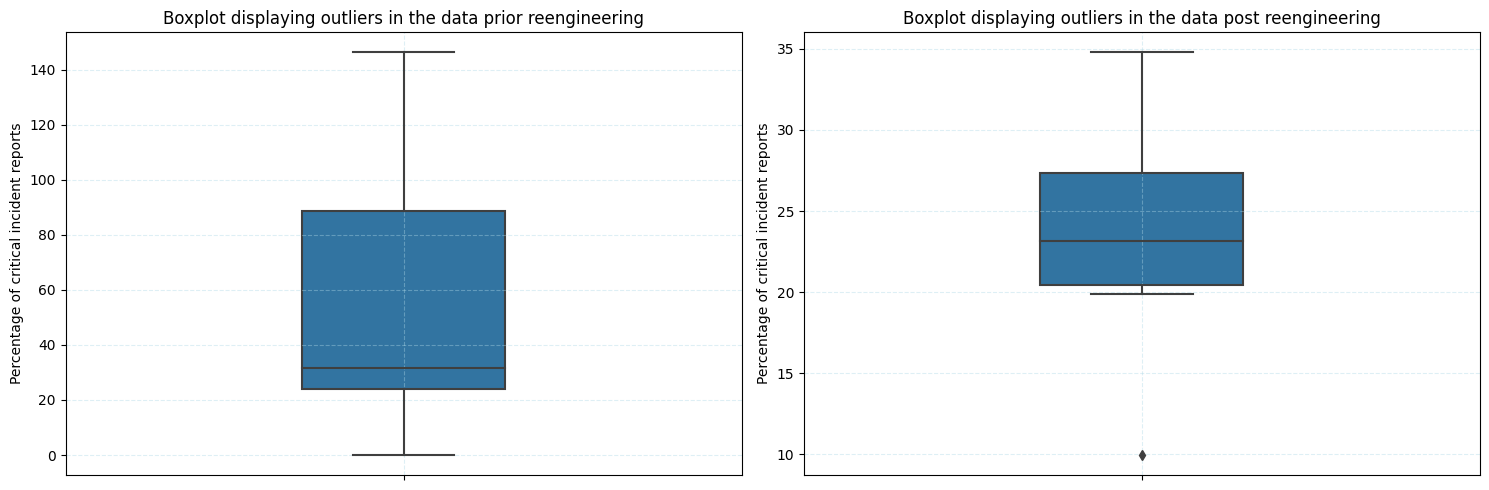

In [60]:
# To visualize if there is any Outlier in the data
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(y=prior_reeng, width=0.3)
plt.title('Boxplot displaying outliers in the data prior reengineering')
plt.ylabel('Percentage of critical incident reports')
plt.grid(color='lightblue', alpha=0.4,linestyle='--')


plt.subplot(1,2,2)
sns.boxplot(y=post_reeng, width=0.3)
plt.title('Boxplot displaying outliers in the data post reengineering')
plt.ylabel('Percentage of critical incident reports')
plt.grid(color='lightblue', alpha=0.4,linestyle='--')

plt.tight_layout()
plt.show()

In [61]:
# Finding lower and upper limit for prior reengineering

q_1_prior = prior_reeng.quantile(0.25)
q_3_prior = prior_reeng.quantile(0.75)
IQR_prior = q_3_prior - q_1_prior
lower_limit_prior = q_1_prior - 1.5 * IQR_prior
upper_limit_prior = q_3_prior + 1.5 * IQR_prior

print('q_1_prior: ', q_1_prior)
print('q_3_prior: ', q_3_prior)
print('IQR_prior: ', IQR_prior)
print('lower_limit_prior: ', lower_limit_prior)
print('upper_limit_prior: ', upper_limit_prior)

prior_reeng


# Finding lower and upper limit for post reengineering

q_1_post = post_reeng.quantile(0.25)
q_3_post = post_reeng.quantile(0.75)
IQR_post = q_3_post - q_1_post
lower_limit_post = q_1_post - 1.5 * IQR_post
upper_limit_post = q_3_post + 1.5 * IQR_post

print('q_1_post: ', q_1_post)
print('q_3_post: ', q_3_post)
print('IQR_post: ', IQR_post)
print('lower_limit_post: ', lower_limit_post)
print('upper_limit_post: ', upper_limit_post)



q_1_prior:  23.952095808
q_3_prior:  88.75739645
IQR_prior:  64.805300642
lower_limit_prior:  -73.255855155
upper_limit_prior:  185.96534741300002
q_1_post:  20.4544504365
q_3_post:  27.329064242999998
IQR_post:  6.8746138064999975
lower_limit_post:  10.142529726750004
upper_limit_post:  37.640984952749996


In [62]:
# Prior reengineering data after outlier treatment 
Prior_eng_aft_outlier = Treatment_Facility.loc[(Treatment_Facility['Reengineer'] == 'Prior') & 
                                               (Treatment_Facility['CI'] >= lower_limit_prior) & 
                                               (Treatment_Facility['CI'] <= upper_limit_prior)]['CI']


# post reengineering data after outlier treatment 
Post_eng_aft_outlier = Treatment_Facility.loc[(Treatment_Facility['Reengineer'] == 'Post') & 
                                              (Treatment_Facility['CI'] >= lower_limit_post) & 
                                              (Treatment_Facility['CI'] <= upper_limit_post)]['CI']

In [63]:
stats.f_oneway(Prior_eng_aft_outlier,Post_eng_aft_outlier)

F_onewayResult(statistic=1.9542277595809756, pvalue=0.18010706106074004)

As, pvalue > p
0.18010706106074004 > 0.05

###### Conclusion: 
As calculated pvalue is greater then the confidence interval so we fail to reject the null hypothesis.
Both samples are from different populations.


###### Business conclusion:
As per the analysis we can say reengineering done by The New Life Residential Treatment Facility was might not be very effective as it as not able to control the incidence behavioral problems. With 95% confidence we can say incidence behavioral problems ha increased after the reengineering.

##### Reengineering effort had on the staff turnover

In [64]:
# Employee turnover prior the reengineering
Employee_Turnover_prior = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Prior', 'Employee_Turnover']

# Employee turnover post the reengineering
Employee_Turnover_post = Treatment_Facility.loc[Treatment_Facility.Reengineer == 'Post', 'Employee_Turnover']

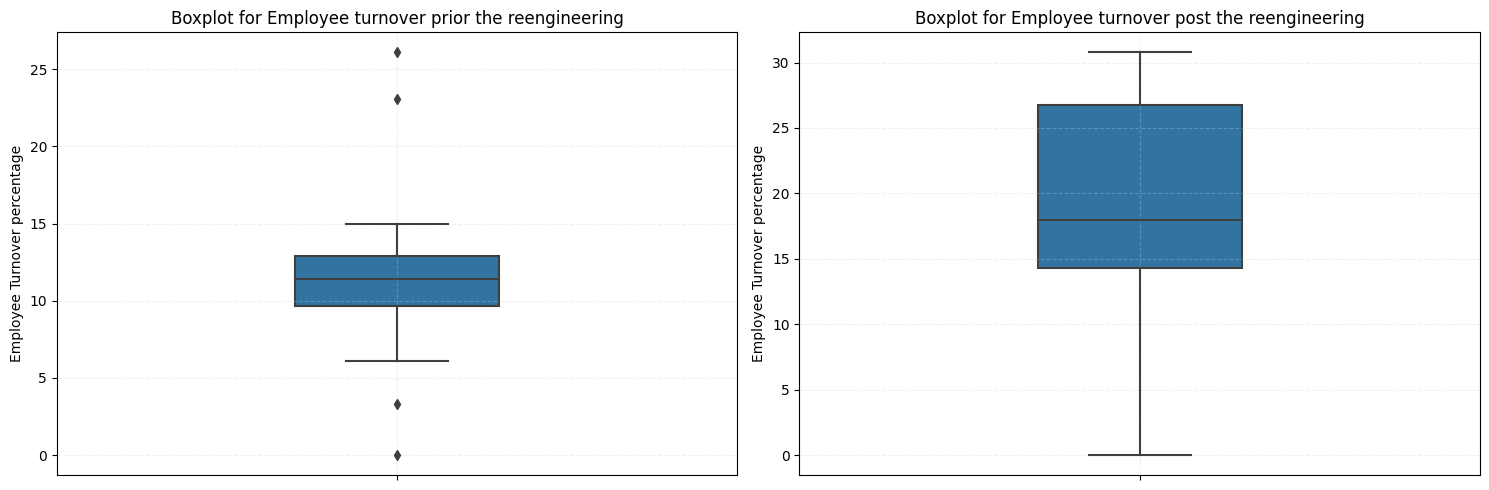

In [65]:
# To visualize if there is any Outlier in the data

plt.figure(figsize=(15,5))

# Boxplot for Employee turnover prior the reengineering
plt.subplot(1,2,1)
sns.boxplot(y= Employee_Turnover_prior,width=0.3)
plt.title('Boxplot for Employee turnover prior the reengineering')
plt.ylabel('Employee Turnover percentage')
plt.grid(color='lightblue', alpha=0.3,linestyle='--')


# Boxplot for Employee turnover post the reengineering
plt.subplot(1,2,2)
sns.boxplot(y= Employee_Turnover_post,width=0.3)
plt.title('Boxplot for Employee turnover post the reengineering')
plt.ylabel('Employee Turnover percentage')
plt.grid(color='lightblue', alpha=0.3,linestyle='--')

plt.tight_layout()
plt.show()

In [66]:
# There are many outliers in the data, for which outlier treatment needs to be done

q1_prior = Employee_Turnover_prior.quantile(0.25)
q3_prior = Employee_Turnover_prior.quantile(0.75)
IQR_prior = q3_prior - q1_prior
lower_lmt_prior = q1_prior - 1.5*IQR_prior
upper_lmt_prior = q3_prior + 1.5*IQR_prior


print('q1_prior: ', q1_prior)
print('q3_prior: ', q3_prior)
print('IQR_prior: ', IQR_prior)
print('lower_lmt_prior: ', lower_lmt_prior)
print('upper_lmt_prior: ', upper_lmt_prior)

# just to make sepration 
print('')

q1_post = Employee_Turnover_post.quantile(0.25)
q3_post = Employee_Turnover_post.quantile(0.75)
IQR_post = q3_post - q1_post
lower_lmt_post = q1_post - 1.5*IQR_post
upper_lmt_post = q3_post + 1.5*IQR_post


print('q1_post: ', q1_post)
print('q3_post: ', q3_post)
print('IQR_post: ', IQR_post)
print('lower_lmt_post: ', lower_lmt_post)
print('upper_lmt_post: ', upper_lmt_post)


q1_prior:  9.6774
q3_prior:  12.9032
IQR_prior:  3.2257999999999996
lower_lmt_prior:  4.838700000000001
upper_lmt_prior:  17.7419

q1_post:  14.305
q3_post:  26.747999999999998
IQR_post:  12.442999999999998
lower_lmt_post:  -4.359499999999997
upper_lmt_post:  45.412499999999994


In [67]:
# Employee Turnover prior reengineering post outlier treatment
Employee_Turnover_aft_out_prior = Treatment_Facility.loc[(Treatment_Facility['Reengineer'] =='Prior') &
                      (Treatment_Facility['Employee_Turnover'] >= lower_lmt_prior) &
                      (Treatment_Facility['Employee_Turnover'] <= upper_lmt_prior)]['Employee_Turnover']

# Employee Turnover post reengineering post outlier treatment
Employee_Turnover_aft_out_prior = Treatment_Facility.loc[(Treatment_Facility['Reengineer'] =='Post') &
                      (Treatment_Facility['Employee_Turnover'] >= lower_lmt_post) &
                      (Treatment_Facility['Employee_Turnover'] <= upper_lmt_post)]['Employee_Turnover']

In [68]:
stats.f_oneway(Employee_Turnover_aft_out_prior,Employee_Turnover_aft_out_prior)

F_onewayResult(statistic=0.0, pvalue=1.0)

As, pvalue > p
1.0 > 0.05

##### Conclusion:
As per the f-test, we fail to reject the null hypothesis. Both samples are from different populations.

##### Business conclusion:
As per the analysis we can say reengineering done by The New Life Residential Treatment Facility was might not be very effective as it as not able to control attrition rate. With 95% confidence we can say Employees are not happy in the organization. Some concrete steps needs to be taken in this regards.

# BUSINESS PROBLEM-4

BACKGROUND: Software development projectstypically follow six basic phases: Requirements,
design, implementation (and integration), testing (validation), deployment (installation) and
maintenance. First, general requirements are gathered, and the scope of the functionality is
defined. Then, alternative scenarios for the required functionality are developed and
evaluated. Implementation, usually 50% or more of the development time, is the phase in
which the design istranslated into programs and integrated with other parts of the software –
this is when software engineers actually develop the code. During the final phases, programs
are tested, software is put into use, and faults or performance issues are addressed.
ApDudes, a developer of applicationsfor tablet computers, was having difficulty meeting
project deadlines; only 10% of their projects had been completed within budget and on time
last year and that wasstarting to hurt business. The group’s project manager wastasked with
studying problems within the implementation phase. He found thatsoftware engineers were
having difficulty prioritizing their work, and that they often became overwhelmed by the
magnitude of the projects.
As a result, two changes were made. Each project was broken down into smaller, distinct
tasks, or jobs, and each job was assigned a priority. The project manager believes that this
classification and prioritization system would speed the completion of high priority jobs, and
thuslower overall project completion time



### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

DATA AVAILABLE:
 Priority_Assessment.csv


The data set contains a random sample of 642 jobs completed over the lastsix months. The
variables in the data set are:
Days The number of days it took to complete the job
Priority The priority level assigned to that job

In [69]:
PA = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Basic_Statistics_Hypothesis_Testing\/Priority_Assessment.csv")

In [70]:
PA.head(1)

,Days,Priority
0,3.3,High


In [71]:
PA.describe()

,Days
count,642.000000
mean,2.946262
std,6.687063
min,0.100000
25%,0.200000
50%,0.600000
75%,2.500000
max,72.900000


In [72]:
PA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [73]:
PA.Priority.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [74]:
# Data cleaning

In [75]:
# Dropping duplicate records
PA.drop_duplicates(inplace=True)

In [76]:
PA.isna().sum()
# No null value found

Days        0
Priority    0
dtype: int64

In [77]:
# Outlier treatment

PA_high = PA[PA['Priority'] == 'High']['Days']
PA_medium = PA[PA['Priority'] == 'Medium']['Days']
PA_low = PA[PA['Priority'] == 'Low']['Days']

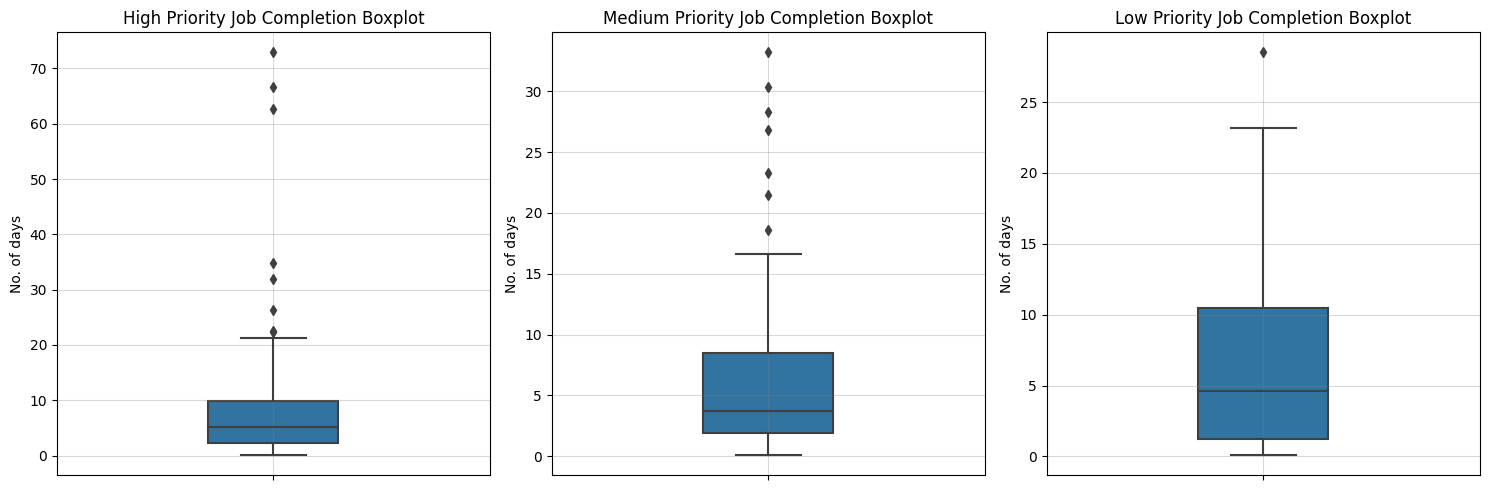

In [78]:
#  To visualize the outliers
plt.figure(figsize=(15,5))

# Boxplot for high priority tasks
plt.subplot(1,3,1)
sns.boxplot(y=PA_high, width=0.3)
plt.title('High Priority Job Completion Boxplot')
plt.ylabel('No. of days')
plt.grid(color='gray', alpha=0.3)


# Boxplot for medium priority tasks
plt.subplot(1,3,2)
sns.boxplot(y=PA_medium, width=0.3)
plt.title('Medium Priority Job Completion Boxplot')
plt.ylabel('No. of days')
plt.grid(color='gray', alpha=0.3)


# Boxplot for low priority tasks
plt.subplot(1,3,3)
sns.boxplot(y=PA_low, width=0.3)
plt.title('Low Priority Job Completion Boxplot')
plt.ylabel('No. of days')
plt.grid(color='gray', alpha=0.3)

plt.tight_layout()
plt.show()

In [79]:
# There are many outliers in the data, for which outlier treatment needs to be done

p_high_1 = PA_high.quantile(0.25)
p_high_3 = PA_high.quantile(0.75)
IQR_high = p_high_3 - p_high_1
lower_limit_high = p_high_1 - 1.5 * IQR_high
upper_limit_high = p_high_3 + 1.5 * IQR_high
print('p_high_1: ',p_high_1)
print('p_high_3: ',p_high_3)
print('IQR_high: ',IQR_high)
print('lower_limit_high: ',lower_limit_high)
print('upper_limit_high: ',upper_limit_high)
print('')


p_medium_1 = PA_medium.quantile(0.25)
p_medium_3 = PA_medium.quantile(0.75)
IQR_medium = p_medium_3 - p_medium_1
lower_limit_medium = p_medium_1 - 1.5 * IQR_medium
upper_limit_medium = p_medium_3 + 1.5 * IQR_medium
print('p_medium_1: ',p_medium_1)
print('p_medium_3: ',p_medium_3)
print('IQR_medium: ',IQR_medium)
print('lower_limit_medium: ',lower_limit_medium)
print('upper_limit_medium: ',upper_limit_medium)
print('')


p_low_1 = PA_low.quantile(0.25)
p_low_3 = PA_low.quantile(0.75)
IQR_low = p_low_3 - p_low_1
lower_limit_low = p_low_1 - 1.5 * IQR_low
upper_limit_low = p_low_3 + 1.5 * IQR_low
print('p_low_1: ',p_low_1)
print('p_low_3: ',p_low_3)
print('IQR_low: ',IQR_low)
print('lower_limit_low: ',lower_limit_low)
print('upper_limit_low: ',upper_limit_low)

p_high_1:  2.2
p_high_3:  9.9
IQR_high:  7.7
lower_limit_high:  -9.350000000000001
upper_limit_high:  21.450000000000003

p_medium_1:  1.875
p_medium_3:  8.525
IQR_medium:  6.65
lower_limit_medium:  -8.100000000000001
upper_limit_medium:  18.5

p_low_1:  1.25
p_low_3:  10.5
IQR_low:  9.25
lower_limit_low:  -12.625
upper_limit_low:  24.375


In [80]:
# Outlier treatment

PA_high = PA[PA['Priority'] == 'High']['Days']
PA_medium = PA[PA['Priority'] == 'Medium']['Days']
PA_low = PA[PA['Priority'] == 'Low']['Days']

In [81]:
#Removing outliers from the data


PA_h = PA[(PA['Priority']=='High') &
         (PA['Days'] >= lower_limit_high) &
         (PA['Days'] <= upper_limit_high)]['Days']

PA_m = PA[(PA['Priority']=='Medium') &
         (PA['Days'] >= lower_limit_medium) &
         (PA['Days'] <= upper_limit_medium)]['Days']

PA_l = PA[(PA['Priority']=='Low') &
         (PA['Days'] >= lower_limit_low) &
         (PA['Days'] <= upper_limit_low)]['Days']

##### Perform the test

In [82]:
stats.f_oneway(PA_h,PA_m,PA_l)

F_onewayResult(statistic=1.3192855156133616, pvalue=0.27013104936108057)

As pvalue > p
0.27013104936108057 > 0.05

##### Conclusion:
We fail to reject the null hypothesis. All the samples are from same population.

##### Business conclusion:
As the the statstical tets we are 95% sure that there is no effect of prioritization system on the time to compleate task.

# BUSINESS PROBLEM-5


### BackGround: 

Film on the Rocksis a summer movie series held at the world-renowned Red
Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison,
Colorado fifteen miles west of Denver. The film seriesfeatures classic films, and pre-show
entertainment including bands and comedians. Among the features that have made Red Rocks
an internationally-famous concertstage are sweeping views of Denver, outstanding acoustics,
and cool, dry Colorado summers.

The seriesis jointly promoted by the Denver Film Society (DFS) and the City and County of
Denver’s Division of Theatres and Arenas(DT&A). It is marketed through various outlets
including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the
Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and
banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate
fundsthat keep ticket priceslow.

Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue,
there are tradeoffs. Red Rocks is a farther commute for most people than the local movie
theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot,
getting there can be challenging. And, as an outdoor venue, the viewing experience is
dependent on the weather.

Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But,
the series promoters would also like to increase attendance at the film series, and are unsure
how to do this. Promotersrecognize that they need a better understanding of the customer
base, and of the current level of satisfaction. Knowing the demographics of those who attend
the film series will help attract and expand corporate sponsorship. In addition, knowing which
media outlets are most effective will provideinformation about how best to target future
marketing campaigns.

To this end, the promoters conducted surveys during a recent Film on the Rocks season.
Questionnaires were handed out at the entrance. Volunteers walked through the crowd to
remind people about the free soft drink given to those who returned the survey.


## BUSINESS PROBLEM: 

Use the survey resultsto addressthe following questions

 What isthe overall level of customer satisfaction?

 What factors are linked to satisfaction?

 What is the demographic profile of Film on the Rocks patrons?

 In what media outlet(s) should the film series be advertised?


#### DATA AVAILABLE: 

Data provided by the Denver Film Society
 Films.csv 

#### The data set contains 330 surveys collected during three Film on the Rocks movies:
Ferris Bueller’s Day Off, Old School, and Willy Wonka and the Chocolate Factory.
The variables are:

Gender The patron’s gender: 1 = male; 2 = female

Marital Status The patron’s marital status: 1 = married; 2 = single

Age The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+

Income The patron’s annual household income: 1 = Less than $50,000; 2 = $50-
$100,000; 3 = $100,000+

Hear About The patron’s response to this question: “How did you hear about Film
on the Rocks?” Respondents could check any of the following that applied: 1 = television; 2 =
newspaper; 3 = radio; 4 = website; 5 = word of mouth

The survey also contained four Likert-scaled questions aboutsatisfaction; each of the following
questions is coded: 1 = Excellent; 2 = Good; 3 = Average/Fair; 4 = Poor; 5 = Very Poor.

Signage “How wasthe signage directing you to Red Rocks?”

Parking “How wasthe venue’s parking?”

Clean “How was the cleanliness of the venue?”

Overall “How was your overall customer service experience?'

In [83]:
films= pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data_Science_360/Case_studies/Completed/Python/Basic_Statistics_Hypothesis_Testing/Films.csv")

In [84]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [85]:
films['Movie'].value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [86]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [87]:
films.describe()

,_rowstate_,Sinage,Parking,Clean,Overall,Age,Income
count,330.0,328.000000,328.000000,327.000000,328.000000,328.000000,314.000000
mean,0.0,1.884146,1.756098,1.681957,1.618902,2.338415,1.834395
std,0.0,0.830603,0.798484,0.728313,0.689286,0.666902,0.844808
min,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,0.0,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
max,0.0,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000


In [88]:
print(films['_rowstate_'].nunique())
print(films['Movie'].nunique())
print(films['Gender'].nunique())
print(films['Marital_Status'].nunique())
print(films['Sinage'].nunique())
print(films['Parking'].nunique())
print(films['Clean'].nunique())
print(films['Age'].nunique())
print(films['Income'].nunique())
print(films['Hear_About'].nunique())


# Cardinality of all the columns is very low, that means probability of all of them being categorical veriable is high

1
3
4
5
5
5
5
4
3
11


In [89]:
films.loc[:, 'Gender'].value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [90]:
films.loc[:, 'Marital_Status'].value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [91]:
films.head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5


In [92]:
# To correct this we need to fill the Male insted of 1 and Female insted of 2
films.loc[films['Gender'] == '1', 'Gender'] = 'Male'
films.loc[films['Gender'] == '2', 'Gender'] = 'Female'


# To correct this we need to fill the Male insted of 1 and Female insted of 2
films.loc[films['Marital_Status'] == '1', 'Marital_Status'] = 'Married'
films.loc[films['Marital_Status'] == '2', 'Marital_Status'] = 'Single'
films.loc[films['Marital_Status'] == 'Slngle', 'Marital_Status'] = 'Single'

# Converting age in the provided range
films.loc[films['Age'] == 1,'Age'] = '1-12'
films.loc[films['Age'] == 2,'Age'] = '13-30'
films.loc[films['Age'] == 3,'Age'] = '31-60'
films.loc[films['Age'] == 4,'Age'] = '60+'

# Converting Income in the provided data
films.loc[films['Income']== 1, 'Income'] =  '< 50,000'
films.loc[films['Income']== 2, 'Income'] =  '= 50,000-100,000'
films.loc[films['Income']== 3, 'Income'] =  '> 100,000+'


In [93]:
films.head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,31-60,"< 50,000",5


In [94]:
print(films.duplicated().sum())

# Dropping duplicates

films.drop_duplicates(inplace=True)

51


In [95]:
# Cheacking for Null values
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            14
Hear_About         7
dtype: int64

In [96]:
# As we have sufficient samples we can drop the null values instedd of filling with mode (otherwise we can use mode as this is categorical veriables)
films.dropna(inplace=True)

#####  What isthe overall level of customer satisfaction?

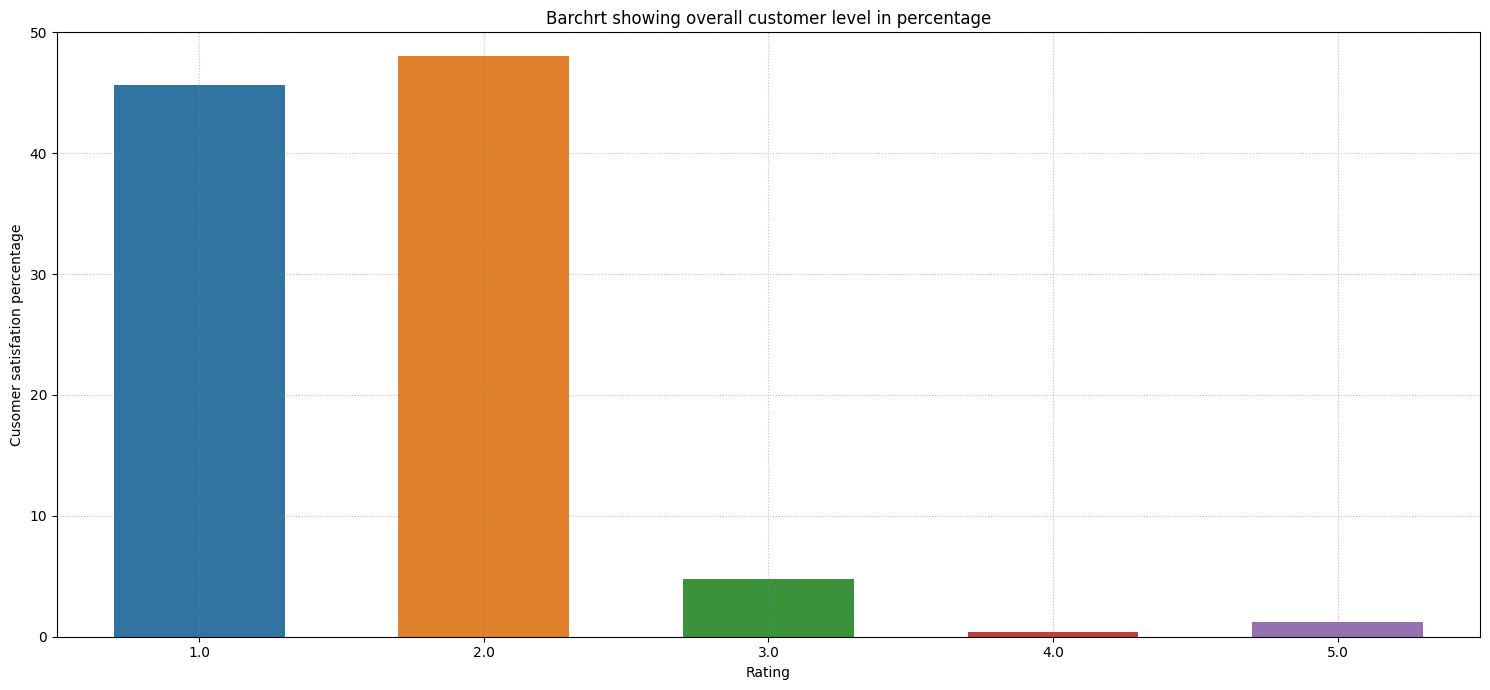

In [97]:
# To visualize the above data

OV = films.loc[:, ['Overall']].groupby(by='Overall')[['Overall']].count()/films.loc[:, ['Overall']].count()
OV.index.rename('Rating', inplace=True)
OV.reset_index(inplace=True)

plt.figure(figsize=(15,7))
sns.barplot(x=OV.Rating, y=(OV.Overall*100), width=0.6)
plt.title('Barchrt showing overall customer level in percentage')
plt.xlabel('Rating')
plt.ylabel('Cusomer satisfation percentage')
plt.ylim(0,50)

plt.grid(color='grey', alpha= 0.5, linestyle=':')
plt.tight_layout()
plt.show()

In [98]:
# Now we have one ordinal categorical veriable as 'Rating' and one continous veriable as 'Overall'
# Now we can perform the Spearsman Rank test.

In [99]:
# Finding satisfaction level
Mean_of_satisfaction = films['Overall'].mean()
Std_0f_satisfaction = films['Overall'].std()
SE_of_satisfaction = Std_0f_satisfaction/math.sqrt(films['Overall'].shape[0])

print('So, the satisfaction level range would be between', (Mean_of_satisfaction - 1.645 * SE_of_satisfaction), 
      'and', (Mean_of_satisfaction + 1.645 * SE_of_satisfaction))

So, the satisfaction level range would be between 1.561964616217622 and 1.7078766536236478


In [100]:
stats.spearmanr(a = OV['Rating'], b= OV['Overall'])

SpearmanrResult(correlation=-0.7999999999999999, pvalue=0.10408803866182788)

As pvalue > p

0.10408803866182788 > 0.1

##### Conclusion:
p-value is above the significance level, we fail to reject the null hypothesis and suggest that there is no significant rank correlation.

##### Business Conclusion:

As there is no correlation between the two veriables we can say with 90% that, as the data suggests there is very high overall satisfation amoung the movie viewers. Also, overall rating range would be 1.561964616217622 and 1.7078766536236478.

#### What factors are linked to satisfaction?

In [101]:
# Movie as a factor for overall satisfaction
Movie = pd.crosstab(columns=films['Movie'],index=films['Overall'])

#performing the test
print(stats.chi2_contingency(Movie)[1])

# Business conclusion: 
# As 0.0674030528462607 < 0.1,so we reject the Null hypothesis. 
# With the 90% confidence we can say that the more the movie experience will be good, the more will satisfaction.
Movie

0.0674030528462607


Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Overall,,,
1.0,42,21,52
2.0,58,9,54
3.0,4,0,8
4.0,1,0,0
5.0,2,1,0


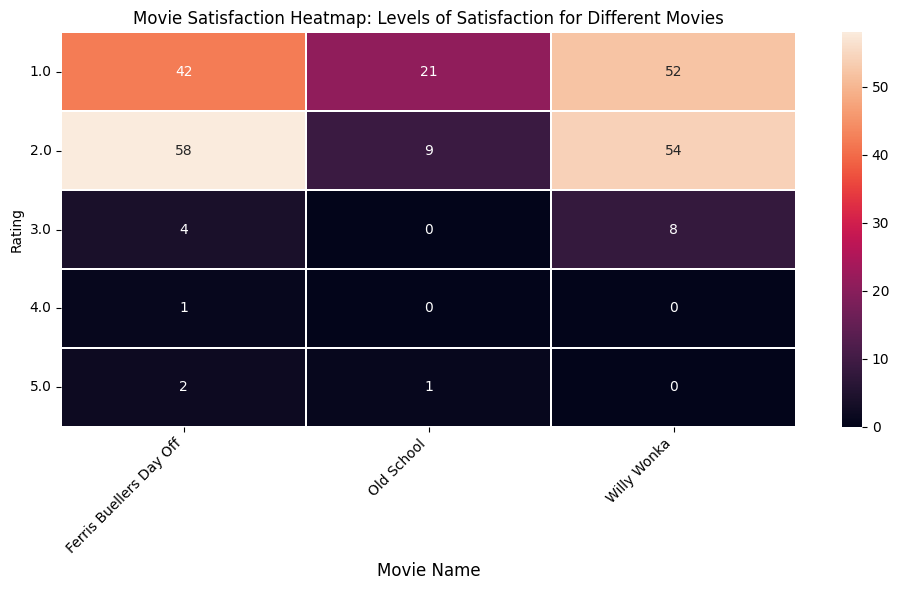

In [102]:
# To visualize
plt.figure(figsize=(10, 6))

sns.heatmap(Movie, annot=True, linewidths=0.1)

plt.title('Movie Satisfaction Heatmap: Levels of Satisfaction for Different Movies')
plt.xlabel('Movie Name', fontsize=12)
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [103]:
# Gender as a factor for overall satisfaction
Gender = pd.crosstab(columns=films['Gender'],index=films['Overall'])

#performing the test
print(stats.chi2_contingency(Gender)[1])

# Business conclusion: 
# As 0.545820732449531 > 0.1,so we fail to reject the Null hypothesis. 
# With the 90% confidence we can say that gender has no impact on satisfaction.
Gender

0.545820732449531


Gender,Female,Male
Overall,,
1.0,73,42
2.0,78,43
3.0,5,7
4.0,1,0
5.0,2,1


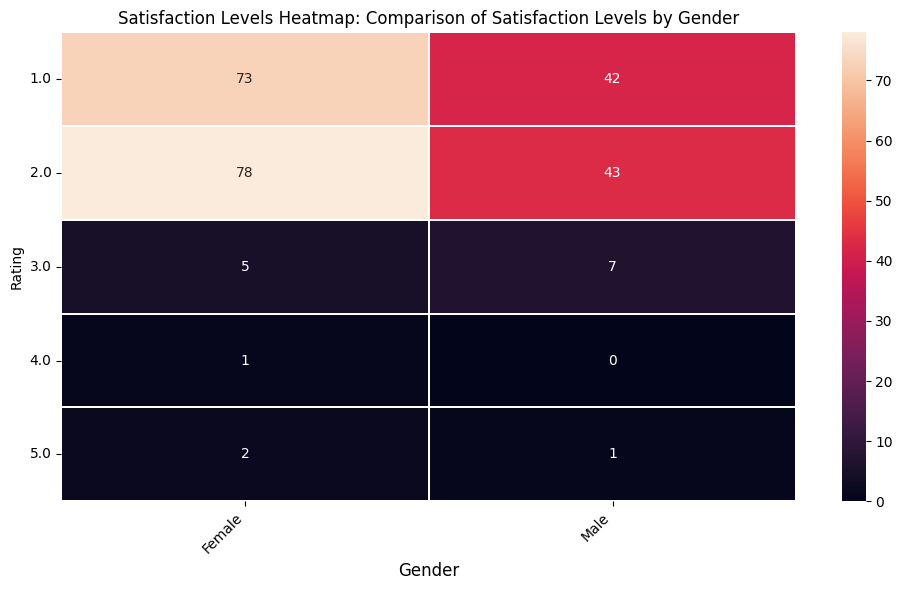

In [104]:
# To visualize
plt.figure(figsize=(10, 6))

sns.heatmap(Gender, annot=True, linewidths=0.1)

plt.title('Satisfaction Levels Heatmap: Comparison of Satisfaction Levels by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [105]:
# Marital_Status as a factor for overall satisfaction
Marital_Status = pd.crosstab(columns=films['Marital_Status'],index=films['Overall'])

#performing the test
print(stats.chi2_contingency(Marital_Status)[1])

# Business conclusion: 
# As 0.29608885802230983 > 0.1,so we fail to reject the Null hypothesis. 
# With the 90% confidence we can say that Marital Status has no impact on satisfaction.
Marital_Status

0.29608885802230983


Marital_Status,Married,Single
Overall,,
1.0,38,77
2.0,38,83
3.0,2,10
4.0,1,0
5.0,0,3


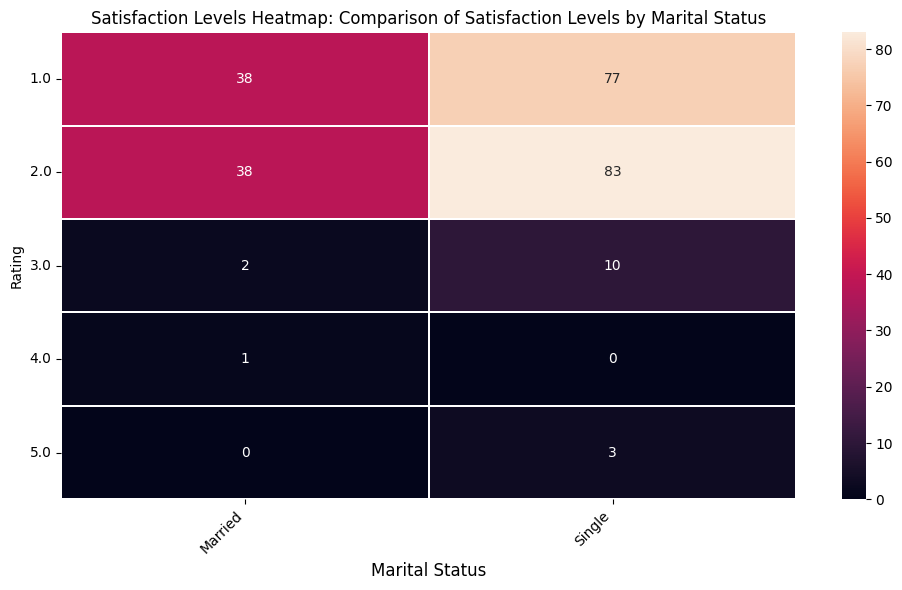

In [106]:
# To visualize
plt.figure(figsize=(10, 6))

sns.heatmap(Marital_Status, annot=True, linewidths=0.1)

plt.title('Satisfaction Levels Heatmap: Comparison of Satisfaction Levels by Marital Status')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [107]:
# Sinage as a factor for overall satisfaction
Sinage = pd.crosstab(columns=films['Sinage'],index=films['Overall'])

#performing the test
print(stats.chi2_contingency(Sinage)[1])

# Business conclusion: 
# As 3.580806905170575e-12 < 0.1,so we reject the Null hypothesis. 
# With the 90% confidence we can say that Sinage has a greater impact on satisfaction.
Sinage

3.580806905170575e-12


Sinage,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,63,37,11,2,2
2.0,19,76,20,4,2
3.0,0,4,8,0,0
4.0,0,0,1,0,0
5.0,0,1,1,0,1


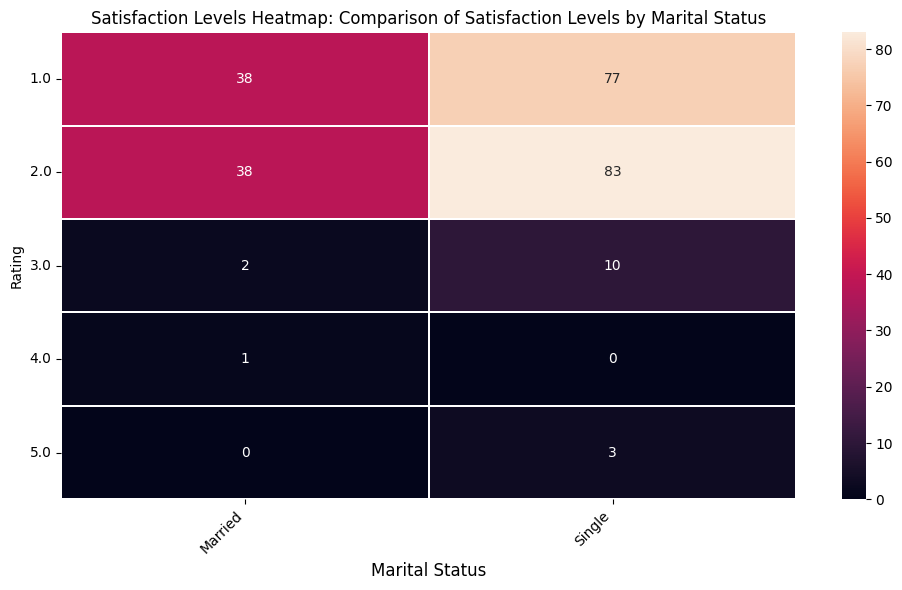

In [108]:
# To visualize
plt.figure(figsize=(10, 6))

sns.heatmap(Marital_Status, annot=True, linewidths=0.1)

plt.title('Satisfaction Levels Heatmap: Comparison of Satisfaction Levels by Marital Status')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [109]:
# Parking as a factor for overall satisfaction
Parking = pd.crosstab(columns=films['Parking'],index=films['Overall'])

#performing the test
print(stats.chi2_contingency(Parking)[1])

# Business conclusion: 
# As 6.813766441877825e-27 < 0.1,so we reject the Null hypothesis. 
# With the 90% confidence we can say that Parking has a greater impact on satisfaction.
Parking

6.813766441877825e-27


Parking,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,74,35,4,2,0
2.0,23,75,19,3,1
3.0,2,3,5,1,1
4.0,0,0,0,0,1
5.0,0,1,0,1,1


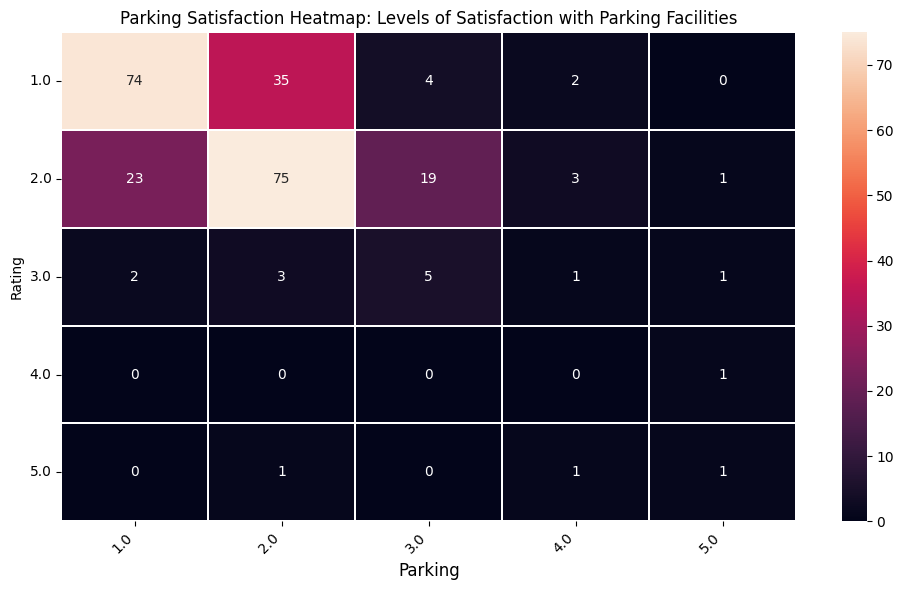

In [110]:
# To visualize
plt.figure(figsize=(10, 6))

sns.heatmap(Parking, annot=True, linewidths=0.1)

plt.title('Parking Satisfaction Heatmap: Levels of Satisfaction with Parking Facilities')
plt.xlabel('Parking', fontsize=12)
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [111]:
# Clean as a factor for overall satisfaction
Clean = pd.crosstab(columns=films['Clean'],index=films['Overall'])

#performing the test
print(stats.chi2_contingency(Clean)[1])

# Business conclusion: 
# As 6.813766441877825e-27 < 0.1,so we reject the Null hypothesis. 
# With the 90% confidence we can say that Cleanliness has a greater impact on satisfaction.
Clean

2.4581258420465415e-12


Clean,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,74,35,4,1,1
2.0,31,73,14,3,0
3.0,3,5,4,0,0
4.0,0,1,0,0,0
5.0,1,1,0,0,1


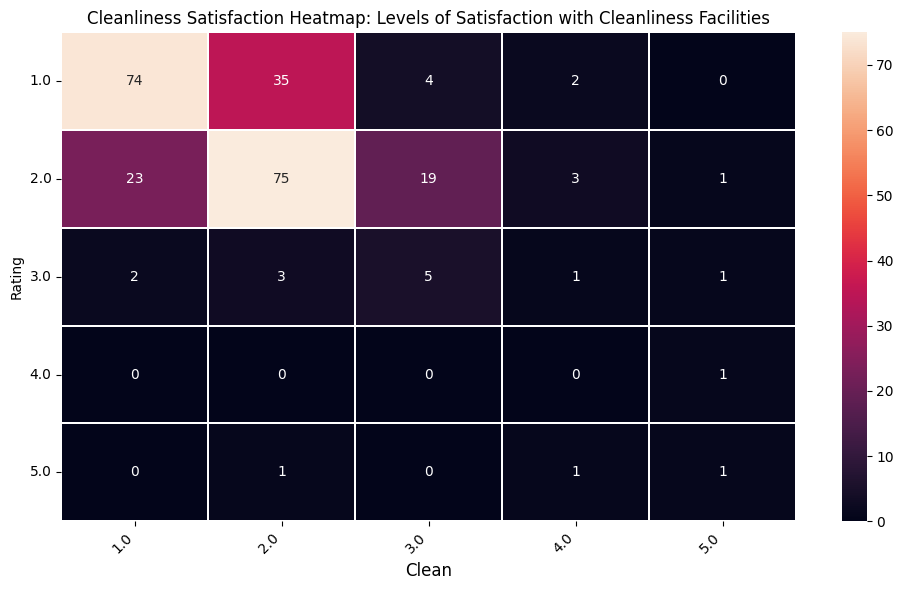

In [112]:
# To visualize
plt.figure(figsize=(10, 6))

sns.heatmap(Parking, annot=True, linewidths=0.1)

plt.title('Cleanliness Satisfaction Heatmap: Levels of Satisfaction with Cleanliness Facilities')
plt.xlabel('Clean', fontsize=12)
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [113]:
# Age as a factor for overall satisfaction
Age = pd.crosstab(columns=films['Age'],index=films['Overall'])

#performing the test
print(stats.chi2_contingency(Age)[1])

# Business conclusion: 
# As 0.506037405321422 > 0.1,so we reject the Null hypothesis. 
# With the 90% confidence we can say that Age has no impact on satisfaction.
Age

0.506037405321422


Age,1-12,13-30,31-60,60+
Overall,,,,
1.0,12,55,46,2
2.0,5,65,46,5
3.0,1,8,3,0
4.0,0,1,0,0
5.0,1,2,0,0


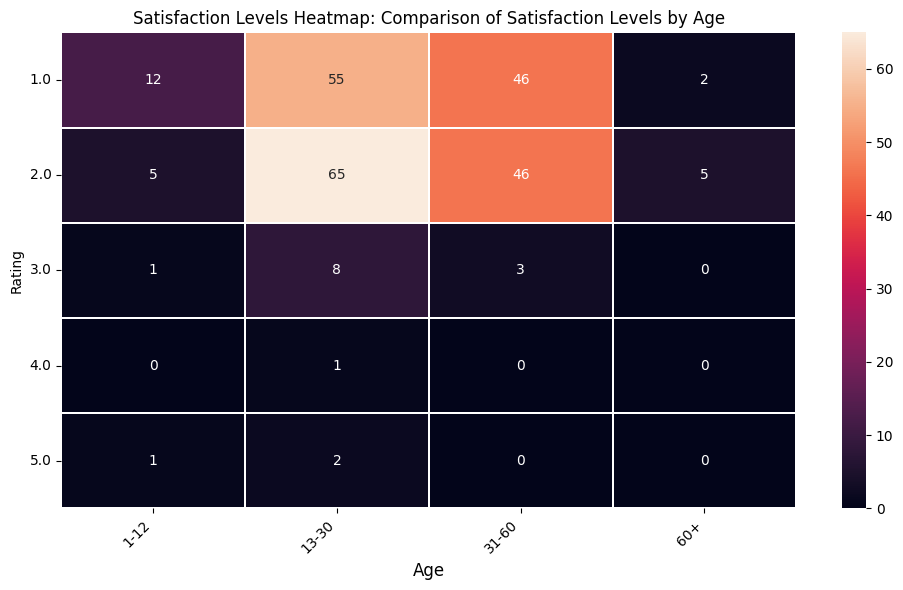

In [114]:
# To visualize
plt.figure(figsize=(10, 6))

sns.heatmap(Age, annot=True, linewidths=0.1)

plt.title('Satisfaction Levels Heatmap: Comparison of Satisfaction Levels by Age')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [115]:
# Income as a factor for overall satisfaction
Income = pd.crosstab(columns=films['Income'],index=films['Overall'])

#performing the test
print(stats.chi2_contingency(Income)[1])

# Business conclusion: 
# As 0.8121994506811611 > 0.1,so we reject the Null hypothesis. 
# With the 90% confidence we can say that Income has no impact on satisfaction.
Income

0.8121994506811611


Income,"< 50,000","= 50,000-100,000","> 100,000+"
Overall,,,
1.0,49,34,32
2.0,50,33,38
3.0,7,4,1
4.0,1,0,0
5.0,1,1,1


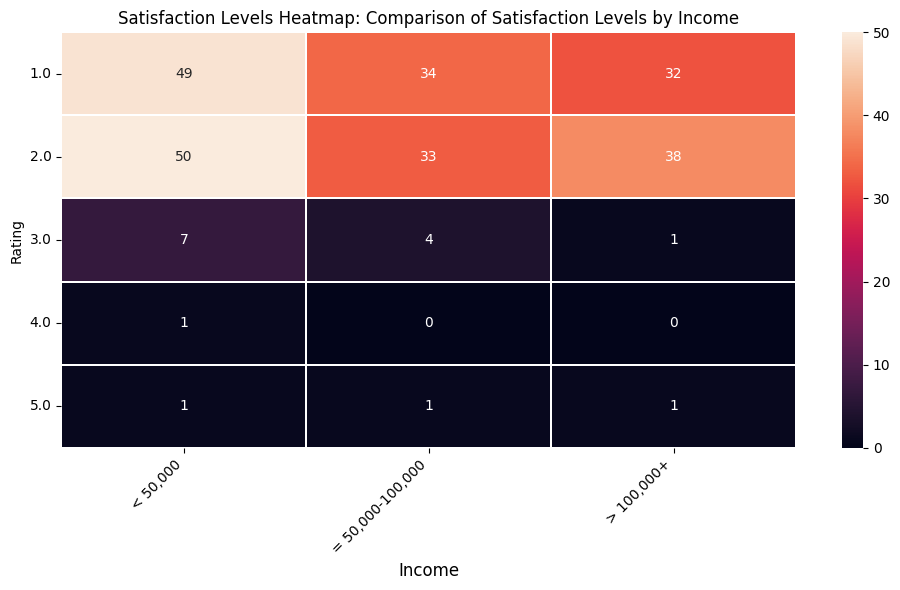

In [116]:
# To visualize
plt.figure(figsize=(10, 6))

sns.heatmap(Income, annot=True, linewidths=0.1)

plt.title('Satisfaction Levels Heatmap: Comparison of Satisfaction Levels by Income')
plt.xlabel('Income', fontsize=12)
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [117]:
# Movie, Cleanliness, Parking and Sinage are the factors which are affacting customer satisfaction.

##### What is the demographic profile of Film on the Rocks patrons?

In [118]:
# Demographic profile 
D_pro = (films.groupby(by=['Gender', 'Marital_Status','Income','Age'])[['_rowstate_']].count()).reset_index()
D_pro.rename(columns={'Age':'Age group', 'Income': 'Income range', '_rowstate_': 'Count'}, inplace=True)
D_pro.head(1)

,Gender,Marital_Status,Income range,Age group,Count
0,Female,Married,"< 50,000",13-30,3


##### In what media outlet(s) should the film series be advertised?

In [119]:
((films.groupby(by='Hear_About')[['_rowstate_']].count())).sort_values(by='_rowstate_', ascending=False).head(3)

,_rowstate_
Hear_About,
5,167
4,37
1,19


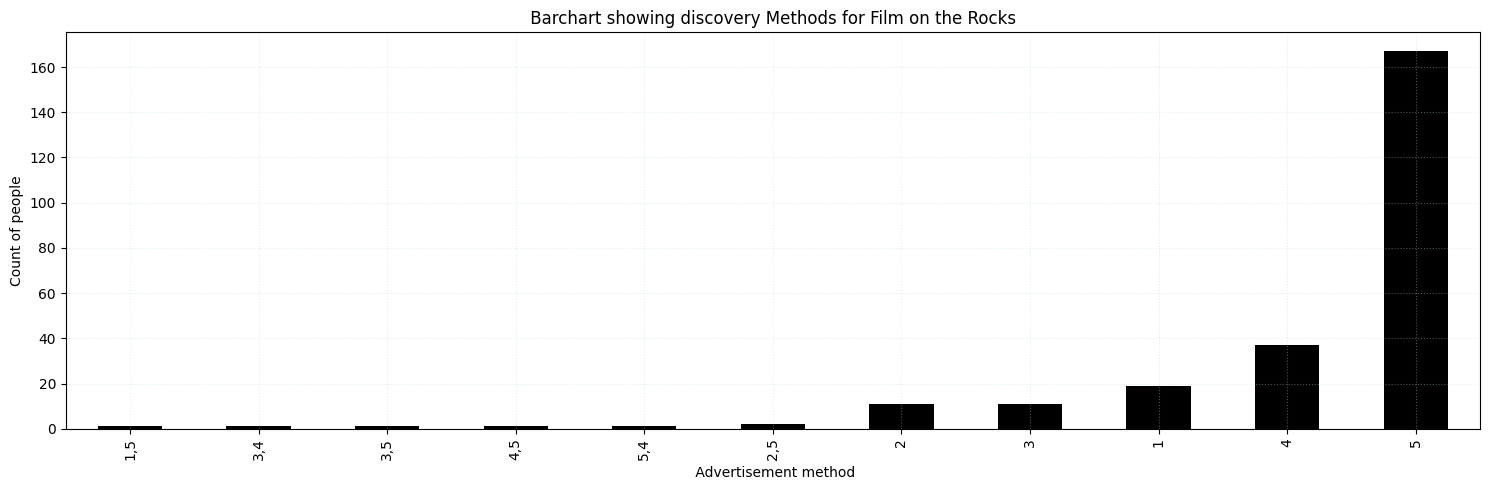

In [120]:
# To visualize
plt.figure(figsize=(15,5))

(((films.groupby(by='Hear_About')[['_rowstate_']].count())).sort_values(by='_rowstate_'))['_rowstate_'].plot(kind='bar', color= 'black')
plt.title(' Barchart showing discovery Methods for Film on the Rocks ')
plt.ylabel('Count of people')
plt.xlabel(' Advertisement method')

plt.grid(color='lightblue', alpha=0.4, linestyle=':')
plt.tight_layout()
plt.show()

In [121]:
print('1 = television; 4 = website; 5 = word of mouth')
print('')
print('Word of mouth (Ranking 1) is highly effective due to personal recommendation and trust, but it is not within the control of advertising agencies. Therefore, agencies should also prioritize website advertising (Ranking 2) and not overlook television advertising (Ranking 3).')

1 = television; 4 = website; 5 = word of mouth

Word of mouth (Ranking 1) is highly effective due to personal recommendation and trust, but it is not within the control of advertising agencies. Therefore, agencies should also prioritize website advertising (Ranking 2) and not overlook television advertising (Ranking 3).
